In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pandas for data manipulation (DataFrames).

train_test_split for splitting data into training and testing sets.

LabelEncoder for converting categorical text data into numerical format.

StandardScaler for standardizing numerical features.

LogisticRegression for building the classification model.

accuracy_score for initial model evaluation.

In [2]:
# --- Load Dataset ---
file_path = r"D:\projects\Machine_failure_ai4i2020_dataset\Dataset\ai4i2020.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()
#provides descriptive statistics for numerical columns

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
df.dtypes
#confirms the data types of all columns

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

# Logistic Regression 

### Evaluation Metrics

These metrics are crucial for evaluating performance on an imbalanced dataset, where high accuracy alone can be misleading.

### Accuracy score 
Code: accuracy = accuracy_score(y_test, y_pred)

Result: Logistic Regression Accuracy: 0.999 (99.9%)

What it is: Accuracy is the proportion of total correct predictions (both positive and negative) out of all predictions made.

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score 

In [8]:
# y_test = actual labels
# y_pred = predicted labels

In [9]:
# --- Encode categorical column ---
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# --- Features and Target ---
X = df.drop(columns=['Machine failure', 'Product ID'])
y = df['Machine failure']

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Scale the features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Logistic Regression with more iterations ---
model = LogisticRegression(max_iter=5000, solver='lbfgs')
model.fit(X_train, y_train)

# --- Accuracy ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.999


### Data Preprocessing:

le = LabelEncoder() and df['Type'] = le.fit_transform(df['Type']):

The categorical column Type (L, M, H) is converted into numerical values (0, 1, 2) using Label Encoding.

X = df.drop(columns=['Machine failure', 'Product ID']) and y = df['Machine failure']: 

Machine failure is defined as the target variable ($y$). Product ID is dropped as it's an identifier, and the remaining columns form the features (X).

X_train, X_test, y_train, y_test = train_test_split(...): 

The data is split into 80% for training and 20% for testing. stratify=y is used to ensure the split maintains the same proportion of the target class (machine failure) in both the training and testing sets, which is vital for imbalanced data.

scaler = StandardScaler(): 

Features are standardized (scaling them to have a mean of 0 and a standard deviation of 1). This is important for distance-based and gradient-descent-based models like Logistic Regression to converge faster and perform optimally.

### Model Fitting:

model = LogisticRegression(max_iter=5000, solver='lbfgs'): A Logistic Regression model is initialized and trained (model.fit(X_train, y_train)).

Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

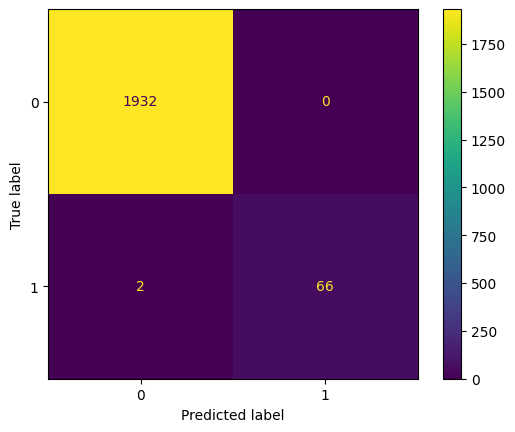

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

TP (True Positive): Correctly predicted failure.

TN (True Negative): Correctly predicted no failure.

FP (False Positive): Predicted failure, but it was not (Type I error).

FN (False Negative): Predicted no failure, but it was (Type II error).

Interpretation: An accuracy of 99.9% seems excellent. However, because the dataset is 96.61% non-failure, a model that simply predicted "0" (no failure) every time would achieve an accuracy of 96.61%. This high score is therefore misleading, highlighting the need for more granular metrics like Precision and Recall.

### Precision score

"Out of all the times the model predicted 'Failure' (1), how many were actually correct?"$$Precision = \frac{TP}{TP + FP}$$

In [12]:
from sklearn.metrics import precision_score

In [13]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 1.0


This means $FP=0$. When the model predicted a machine failure, it was always correct.

In [14]:
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

Precision: 0.999482936918304


Calculates precision for each class separately (0 and 1) and then takes the unweighted average of those two scores. It treats both the majority (0) and minority (1) classes equally.

In [15]:
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.9990010341261634


Calculates precision for each class and then takes the average, weighted by the number of true instances for each class in the test set. It's useful for summarizing performance in imbalanced datasets as it accounts for the class size.

### Recall score
(Sensitivity/True Positive Rate) answers: 

"Out of all the machines that actually failed (1), how many did the model correctly identify?"$$Recall = \frac{TP}{TP + FN}$$

In [16]:
from sklearn.metrics import recall_score

In [17]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9705882352941176


This means the model correctly identified about 97.1% of the actual machine failures. The remaining 2.9% are False Negatives (FN). For a machine failure prediction model, maximizing Recall is often the highest priority, as a False Negative means an unpredicted, potentially costly, breakdown.

In [18]:
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

Recall: 0.9852941176470589


Calculates recall for each class separately (0 and 1) and then takes the unweighted average.

In [19]:
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.999


Calculates recall for each class and then takes the average, weighted by the number of true instances for each class.

### F1-score

What it is: The F1-Score is the harmonic mean of Precision and Recall. 

It balances the two metrics, providing a single score that is a better measure of a model's performance on imbalanced classification problems than accuracy alone.$$F1 Score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

In [20]:
from sklearn.metrics import f1_score

In [21]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9850746268656716


This represents the balanced score for predicting the minority class (Failure). A score close to 1 is excellent.

In [22]:
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

F1 Score: 0.9922786481457173


The unweighted average of the F1-Scores for class 0 and class 1.

In [23]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.9989927959787199


The weighted average of the F1-Scores for class 0 and class 1, accounting for the number of instances in each class.

### Classification report

The Classification Report combines Precision, Recall, and F1-Score for every class (0 and 1), along with the number of true instances for each class (support), providing a comprehensive view of model performance.

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



Support: The number of actual occurrences of the class in the specified dataset (y_test).

Class 0 Support (No Failure): 1932

Class 1 Support (Failure): 68

Macro Avg: The unweighted average of the metric (P, R, or F1) across all classes.

Weighted Avg: The average of the metric across all classes, weighted by the support for each class.

Interpretation:

The model achieves 100% precision for both classes, which is extremely high and indicates minimal False Positives.

The recall for the failure class (1) is 0.97, confirming that 97% of failures were caught. The 3% that were missed are the False Negatives (FN).

The F1-Score of 0.99 for the failure class shows a strong, balanced ability to classify the important minority class.

In [26]:
# Check distribution of classes
print(y.value_counts())

Machine failure
0    9661
1     339
Name: count, dtype: int64


In [27]:
# If using y_train
print(y_train.value_counts())

Machine failure
0    7729
1     271
Name: count, dtype: int64


In [28]:
# If using y_test
print(y_test.value_counts())

Machine failure
0    1932
1      68
Name: count, dtype: int64


# Imbalance Dataset

It refers to a situation where the instances (observations) across the different classes in a classification problem are not evenly distributed (i.e., the class distribution is highly skewed).

Majority Class: The class with a significantly higher number of instances.

Minority Class: The class that is severely underrepresented

### The Core Problem
Most machine learning algorithms are designed to optimize overall accuracy. When a dataset is highly imbalanced, this leads to a fundamental issue:

Model Bias: The model becomes overly influenced by the majority class.

Misleading Accuracy: A model can achieve a very high accuracy rate (e.g., $97\%$ in your case) simply by consistently predicting the majority class and ignoring the minority class.

Poor Minority Performance: The model struggles to make accurate predictions for the minority class, often leading to missed insights or critical errors (like failing to predict a machine failure or a fraudulent transaction).

## Undersampling 
A technique used to handle imbalanced datasets by reducing the number of samples in the majority class so that all classes have a similar number of examples.

In [29]:
from imblearn.under_sampling import RandomUnderSampler

Class distribution BEFORE under-sampling:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Class distribution AFTER under-sampling:
Machine failure
0    339
1    339
Name: count, dtype: int64


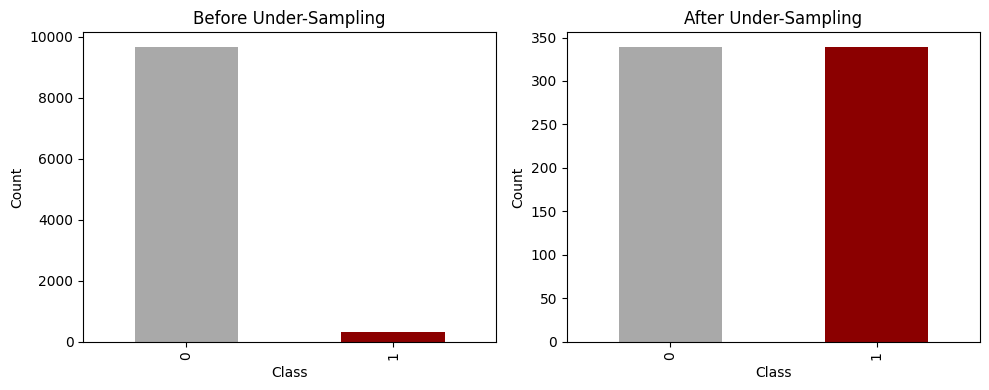

In [30]:
# Encode categorical column 'Type'
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Define Features (X) and Target (y)
X = df.drop(columns=['Machine failure', 'Product ID', 'UDI']) 
y = df['Machine failure']
# --------------------------------------------------------------------------------------


# --- Before Sampling ---
print("Class distribution BEFORE under-sampling:")
print(y.value_counts())

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X, y) # Renamed to _rus

# --- After Sampling ---
print("\nClass distribution AFTER under-sampling:")
print(y_res_rus.value_counts()) # Renamed to _rus

# ---------- Plot Before vs After ----------
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Before
y.value_counts().plot(kind='bar', ax=ax[0], color=['darkgray', 'darkred'])
ax[0].set_title("Before Under-Sampling")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After
y_res_rus.value_counts().plot(kind='bar', ax=ax[1], color=['darkgray', 'darkred']) # Renamed to _rus
ax[1].set_title("After Under-Sampling")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()



--- Evaluation (Logistic Regression on RUS Data) ---
Accuracy: 0.9926470588235294

Confusion Matrix:
 [[68  0]
 [ 1 67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        68

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136


AUC-ROC Score: 0.990916955017301


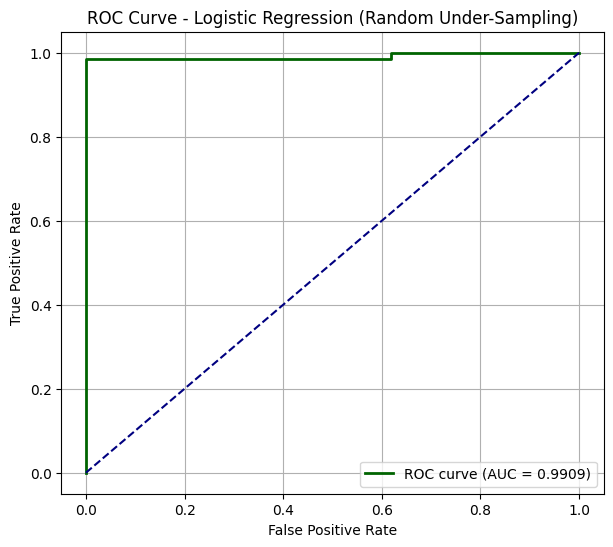

In [31]:

# ------------------------ TRAIN-TEST SPLIT ------------------------
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split( # Renamed all split variables
    X_res_rus, y_res_rus, test_size=0.2, random_state=42, stratify=y_res_rus
)

# ------------------------ SCALING ------------------------
scaler_rus = StandardScaler() # Renamed scaler
X_train_scaled_rus = scaler_rus.fit_transform(X_train_rus) # Renamed
X_test_scaled_rus = scaler_rus.transform(X_test_rus) # Renamed

# ------------------------ MODEL TRAINING ------------------------
model_rus = LogisticRegression(max_iter=1000, random_state=42) # Renamed model
model_rus.fit(X_train_scaled_rus, y_train_rus) # Renamed

# ------------------------ PREDICTIONS ------------------------
y_pred_rus = model_rus.predict(X_test_scaled_rus) # Renamed
# Get prediction probabilities for the positive class (1)
y_proba_rus = model_rus.predict_proba(X_test_scaled_rus)[:, 1] # Renamed

# ------------------------ EVALUATION ------------------------
print("\n--- Evaluation (Logistic Regression on RUS Data) ---")
print("Accuracy:", accuracy_score(y_test_rus, y_pred_rus)) # Renamed
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rus, y_pred_rus)) # Renamed
print("\nClassification Report:\n", classification_report(y_test_rus, y_pred_rus)) # Renamed


# -------------------- ROC AUC CURVE PLOTTING --------------------

# Compute ROC curve metrics and AUC score
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test_rus, y_proba_rus) # Renamed
auc_score_rus = roc_auc_score(y_test_rus, y_proba_rus) # Renamed
print("\nAUC-ROC Score:", auc_score_rus) # Renamed

plt.figure(figsize=(7, 6))
plt.plot(fpr_rus, tpr_rus, linewidth=2, color='darkgreen', label=f"ROC curve (AUC = {auc_score_rus:.4f})") # Renamed
plt.plot([0, 1], [0, 1], color='navy', linestyle="--") # Diagonal reference line (Random classifier)

plt.title("ROC Curve - Logistic Regression (Random Under-Sampling)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

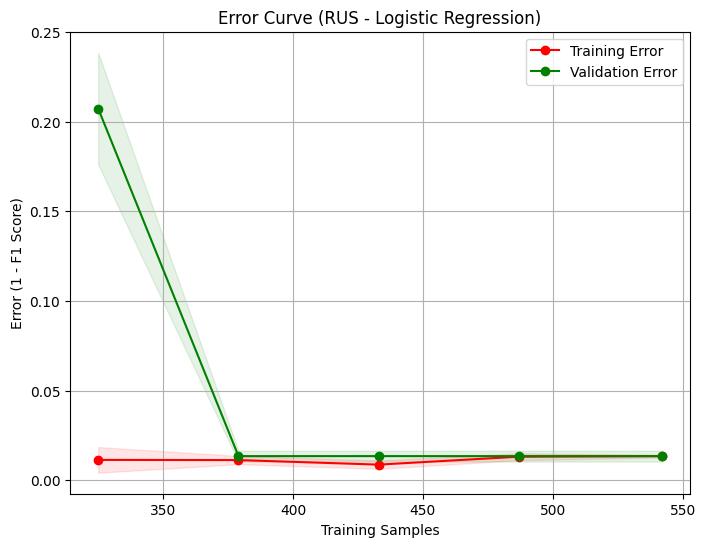

In [32]:
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
import numpy as np

# ---- F1 scorer ----
f1_scorer = make_scorer(f1_score)

# ---- Stratified CV ----
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Full Data (RUS) ----
X_full = scaler_rus.fit_transform(X_res_rus)
y_full = y_res_rus

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rus,
    X=X_full,
    y=y_full,
    cv=cv,
    scoring=f1_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.6, 1.0, 5),
    error_score=np.nan
)

# ---- Convert F1 → Error ----
train_error = 1 - train_scores
test_error  = 1 - test_scores

# ---- Mean & Std ----
train_mean_error = np.nanmean(train_error, axis=1)
test_mean_error  = np.nanmean(test_error, axis=1)
train_std_error  = np.nanstd(train_error, axis=1)
test_std_error   = np.nanstd(test_error, axis=1)

# ---- Plot Error Curve ----
plt.figure(figsize=(8, 6))
plt.title("Error Curve (RUS - Logistic Regression)")
plt.xlabel("Training Samples")
plt.ylabel("Error (1 - F1 Score)")
plt.grid(True)

plt.fill_between(train_sizes,
                 train_mean_error - train_std_error,
                 train_mean_error + train_std_error,
                 alpha=0.1, color="red")

plt.fill_between(train_sizes,
                 test_mean_error - test_std_error,
                 test_mean_error + test_std_error,
                 alpha=0.1, color="green")

plt.plot(train_sizes, train_mean_error, "o-", color="red", label="Training Error")
plt.plot(train_sizes, test_mean_error, "o-", color="green", label="Validation Error")

plt.legend(loc="upper right")
plt.show()


## Oversampling 
A technique used to handle imbalanced datasets by increasing the number of samples in the minority class, either by duplicating existing samples or generating synthetic examples such as with SMOTE.

In [33]:
from imblearn.over_sampling import RandomOverSampler

Class distribution BEFORE over-sampling:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Class distribution AFTER over-sampling:
Machine failure
0    9661
1    9661
Name: count, dtype: int64


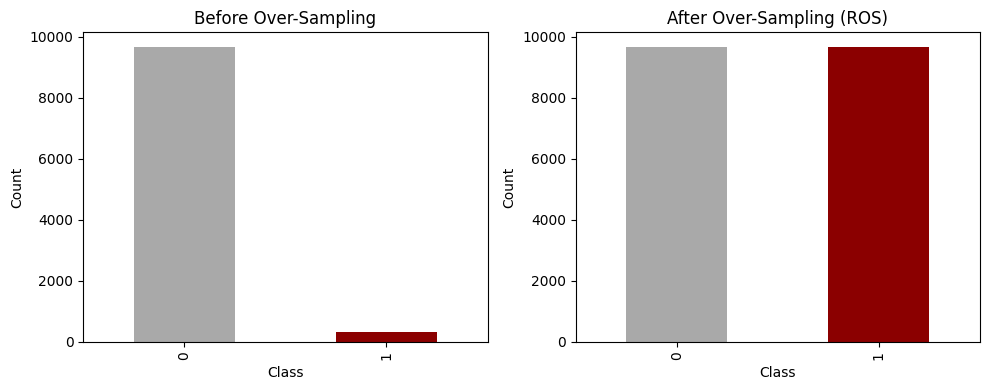

In [34]:

# Encode categorical column 'Type'
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Define Features (X) and Target (y)
X = df.drop(columns=['Machine failure', 'Product ID', 'UDI']) 
y = df['Machine failure']
# --------------------------------------------------------------------------------------


# --- Before Sampling ---
print("Class distribution BEFORE over-sampling:")
print(y.value_counts())

# Apply Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X, y) # Renamed to _ros

# --- After Sampling ---
print("\nClass distribution AFTER over-sampling:")
print(y_res_ros.value_counts()) # Renamed to _ros

# ---------- Plot Before vs After ----------
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Before
y.value_counts().plot(kind='bar', ax=ax[0], color=['darkgray', 'darkred'])
ax[0].set_title("Before Over-Sampling")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After
y_res_ros.value_counts().plot(kind='bar', ax=ax[1], color=['darkgray', 'darkred']) # Renamed to _ros
ax[1].set_title("After Over-Sampling (ROS)")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


--- Evaluation (Logistic Regression on ROS Data) ---
Accuracy: 0.9834411384217335

Confusion Matrix:
 [[1933    0]
 [  64 1868]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1933
           1       1.00      0.97      0.98      1932

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865


AUC-ROC Score: 0.9887965262805003


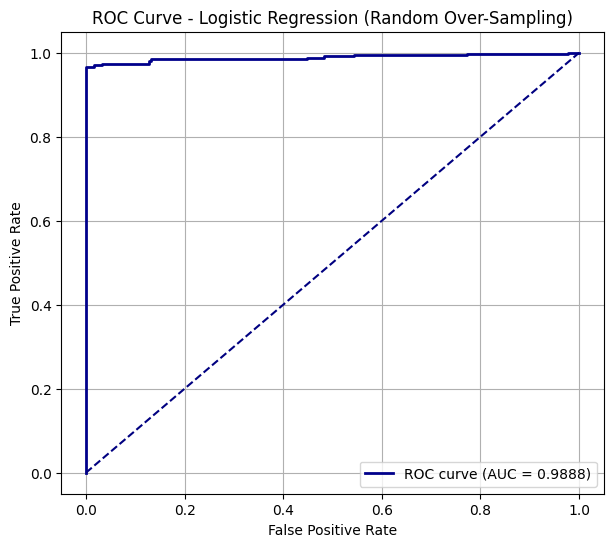

In [35]:


# ------------------------ TRAIN-TEST SPLIT ------------------------
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split( 
    X_res_ros, y_res_ros, test_size=0.2, random_state=42, stratify=y_res_ros
)

# ------------------------ SCALING ------------------------
scaler_ros = StandardScaler() 
X_train_scaled_ros = scaler_ros.fit_transform(X_train_ros) 
X_test_scaled_ros = scaler_ros.transform(X_test_ros) 

# ------------------------ MODEL TRAINING ------------------------
model_ros = LogisticRegression(max_iter=1000, random_state=42) 
model_ros.fit(X_train_scaled_ros, y_train_ros) 

# ------------------------ PREDICTIONS ------------------------
y_pred_ros = model_ros.predict(X_test_scaled_ros) 
# Get prediction probabilities for the positive class (1)
y_proba_ros = model_ros.predict_proba(X_test_scaled_ros)[:, 1] 

# ------------------------ EVALUATION ------------------------
print("\n--- Evaluation (Logistic Regression on ROS Data) ---")
print("Accuracy:", accuracy_score(y_test_ros, y_pred_ros)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test_ros, y_pred_ros)) 
print("\nClassification Report:\n", classification_report(y_test_ros, y_pred_ros)) 


# -------------------- ROC AUC CURVE PLOTTING --------------------

# Compute ROC curve metrics and AUC score
fpr_ros, tpr_ros, thresholds_ros = roc_curve(y_test_ros, y_proba_ros) 
auc_score_ros = roc_auc_score(y_test_ros, y_proba_ros) 
print("\nAUC-ROC Score:", auc_score_ros)

plt.figure(figsize=(7, 6))
plt.plot(fpr_ros, tpr_ros, linewidth=2, color='darkblue', label=f"ROC curve (AUC = {auc_score_ros:.4f})") 
plt.plot([0, 1], [0, 1], color='navy', linestyle="--") # Diagonal reference line (Random classifier)

plt.title("ROC Curve - Logistic Regression (Random Over-Sampling)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

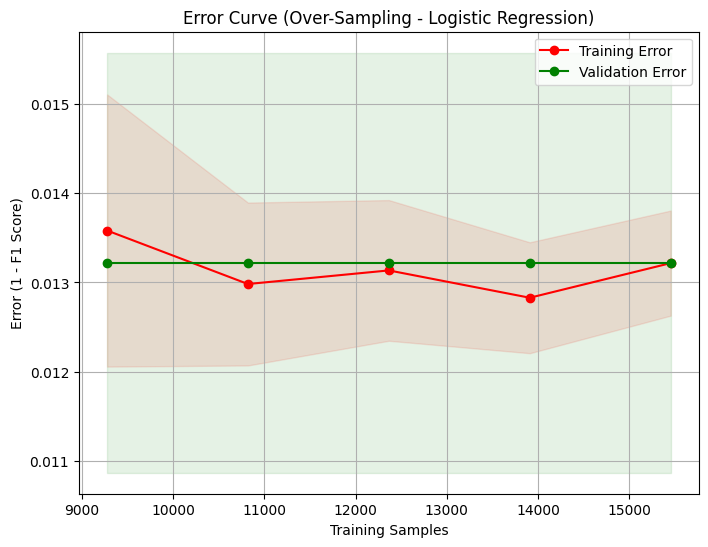

In [36]:
# ---- F1 scorer ----
f1_scorer = make_scorer(f1_score)

# ---- Stratified CV ----
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Full ROS data ----
X_full_ros = scaler_ros.fit_transform(X_res_ros)
y_full_ros = y_res_ros

# ---- Learning Curve ----
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=model_ros,
    X=X_full_ros,
    y=y_full_ros,
    cv=cv,
    scoring=f1_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.6, 1.0, 5),   # prevents single-class folds
    error_score=np.nan
)

# ---- Convert F1 → Error ----
train_error_ros = 1 - train_scores_ros
test_error_ros  = 1 - test_scores_ros

# ---- Means & Std ----
train_mean_error = np.nanmean(train_error_ros, axis=1)
test_mean_error  = np.nanmean(test_error_ros, axis=1)
train_std_error  = np.nanstd(train_error_ros, axis=1)
test_std_error   = np.nanstd(test_error_ros, axis=1)

# ---- Plot Error Curve ----
plt.figure(figsize=(8, 6))
plt.title("Error Curve (Over-Sampling - Logistic Regression)")
plt.xlabel("Training Samples")
plt.ylabel("Error (1 - F1 Score)")
plt.grid(True)

plt.fill_between(train_sizes_ros,
                 train_mean_error - train_std_error,
                 train_mean_error + train_std_error,
                 alpha=0.1, color="red")

plt.fill_between(train_sizes_ros,
                 test_mean_error - test_std_error,
                 test_mean_error + test_std_error,
                 alpha=0.1, color="green")

plt.plot(train_sizes_ros, train_mean_error, "o-", color="red", label="Training Error")
plt.plot(train_sizes_ros, test_mean_error, "o-", color="green", label="Validation Error")

plt.legend(loc="upper right")
plt.show()


In [37]:
# ----------------- BEFORE SAMPLING -----------------
print("=== BEFORE SAMPLING ===")
print(y.value_counts(), "\n")

=== BEFORE SAMPLING ===
Machine failure
0    9661
1     339
Name: count, dtype: int64 



In [38]:
# RANDOM UNDER SAMPLING (RUS)
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X, y)
print("=== AFTER UNDER-SAMPLING (RUS) ===")
print(y_res_rus.value_counts(), "\n")
# SPLIT RUS DATA
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    X_res_rus, y_res_rus, test_size=0.2, random_state=42, stratify=y_res_rus
)
print("Train distribution (RUS):")
print(y_train_rus.value_counts(), "\n")

print("Test distribution (RUS):")
print(y_test_rus.value_counts(), "\n")


=== AFTER UNDER-SAMPLING (RUS) ===
Machine failure
0    339
1    339
Name: count, dtype: int64 

Train distribution (RUS):
Machine failure
1    271
0    271
Name: count, dtype: int64 

Test distribution (RUS):
Machine failure
1    68
0    68
Name: count, dtype: int64 



In [39]:
# RANDOM OVER SAMPLING (ROS)
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X, y)

print("=== AFTER OVER-SAMPLING (ROS) ===")
print(y_res_ros.value_counts(), "\n")

# SPLIT ROS DATA
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_res_ros, y_res_ros, test_size=0.2, random_state=42, stratify=y_res_ros
)

print("Train distribution (ROS):")
print(y_train_ros.value_counts(), "\n")

print("Test distribution (ROS):")
print(y_test_ros.value_counts(), "\n")

=== AFTER OVER-SAMPLING (ROS) ===
Machine failure
0    9661
1    9661
Name: count, dtype: int64 

Train distribution (ROS):
Machine failure
1    7729
0    7728
Name: count, dtype: int64 

Test distribution (ROS):
Machine failure
0    1933
1    1932
Name: count, dtype: int64 



### SMOTE (Synthetic Minority Over-sampling Technique) Notes

SMOTE stands for Synthetic Minority Over-sampling Technique. It is an Oversampling Technique designed to solve the problem of class imbalance by creating synthetic new data points for the minority class.

Why Use SMOTE?

Unlike Random Over-Sampling (ROS), which simply duplicates existing minority points and risks the model overfitting to those repeated instances, SMOTE creates new, unique points. This approach reduces the risk of overfitting by helping the model establish a more generalized decision boundary.

How the SMOTE Algorithm Works

The goal of SMOTE is to generate new instances that are similar to the minority class but distinct from the original data.

Select a Minority Sample ($x_i$): The process begins by choosing one data point from the minority class.

Find $k$ Nearest Neighbors ($k$-NN): SMOTE then identifies its $k$ closest neighbors that also belong to the minority class. The parameter for this is controlled by k_neighbors (usually defaulted to 5), which determines the locality of the synthetic data generation.

Choose a Neighbor ($x_{zn}$): A random neighbor is selected from these $k$ neighbors.

Create a Synthetic Point: A vector difference is calculated between the original sample ($x_i$) and the chosen neighbor ($x_{zn}$). This difference is multiplied by a random number ($\lambda$) between 0 and 1, and the result is added back to the original sample.


$$x_{new} = x_i + \lambda \cdot (x_{zn} - x_i)$$


This final step places the synthetic sample ($x_{new}$) randomly along the line segment connecting the two original minority points in the feature space.

Best Practice Implementation for Data Leakage

It is crucial to apply SMOTE correctly to prevent data leakage.

Split First: You must first run train_test_split(X, y, stratify=y) on the original imbalanced data.

Apply SMOTE Only to Training Data: Apply the sm.fit_resample() method only to the training data (X_train and y_train). This ensures that the newly created synthetic data does not influence the scaling or evaluation of the test set.

Scale and Evaluate: Fit your StandardScaler (or similar preprocessing) on the resampled training data (X_train_smote). Use this fitted scaler to transform the untouched test set (X_test). This maintains a realistic testing environment.

In [40]:
from imblearn.over_sampling import SMOTE

--- Data Imbalance ---
Class distribution BEFORE SMOTE (Training Set):
Machine failure
0    7729
1     271
Name: count, dtype: int64

Class distribution AFTER SMOTE (Training Set):
Machine failure
0    7729
1    7729
Name: count, dtype: int64


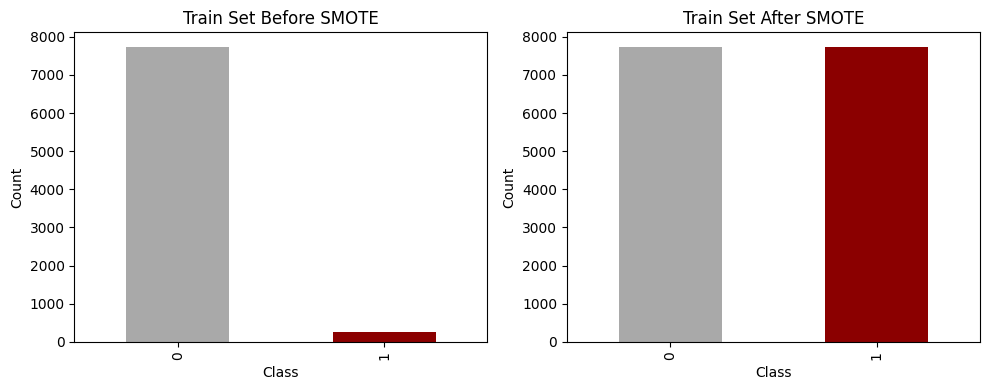

In [41]:
# Encode categorical column 'Type'
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Define Features (X) and Target (y)
X = df.drop(columns=['Machine failure', 'Product ID', 'UDI']) 
y = df['Machine failure']
# --------------------------------------------------------------------------------------


# ------------------------ TRAIN-TEST SPLIT (MUST BE DONE FIRST) ------------------------
# Use unique names for the original split to avoid overwriting the test set variables
X_train_orig, X_test, y_train_orig, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("--- Data Imbalance ---")
print("Class distribution BEFORE SMOTE (Training Set):")
print(y_train_orig.value_counts())

# ------------------------ APPLY SMOTE ONLY ON TRAIN DATA ------------------------
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = sm.fit_resample(X_train_orig, y_train_orig) # Create resampled training data

print("\nClass distribution AFTER SMOTE (Training Set):")
print(y_train_smote.value_counts())

# Plot the training set imbalance before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
y_train_orig.value_counts().plot(kind='bar', ax=ax[0], color=['darkgray', 'darkred'])
ax[0].set_title("Train Set Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

y_train_smote.value_counts().plot(kind='bar', ax=ax[1], color=['darkgray', 'darkred'])
ax[1].set_title("Train Set After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


--- Evaluation on UNTOUCHED Test Set (SMOTE) ---
Accuracy: 0.9545

Confusion Matrix:
 [[1843   89]
 [   2   66]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1932
           1       0.43      0.97      0.59        68

    accuracy                           0.95      2000
   macro avg       0.71      0.96      0.78      2000
weighted avg       0.98      0.95      0.96      2000


AUC-ROC Score: 0.9872503349165754


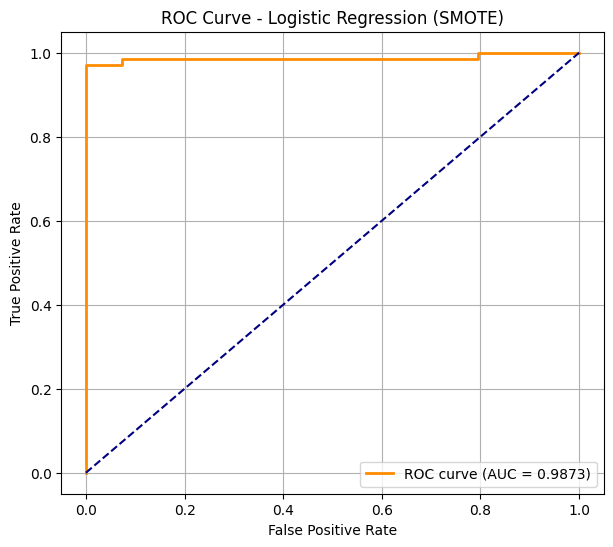

In [42]:
# ------------------------ SCALING ------------------------
# Scale on SMOTE data, transform on untouched test data
scaler_smote = StandardScaler() # Renamed scaler
X_train_scaled_smote = scaler_smote.fit_transform(X_train_smote) # Fit on resampled data
X_test_scaled = scaler_smote.transform(X_test) # Transform the UNTOUCHED test set

# ------------------------ MODEL TRAINING ------------------------
model_smote = LogisticRegression(max_iter=5000, random_state=42) # Renamed model
model_smote.fit(X_train_scaled_smote, y_train_smote) # Train on scaled SMOTE data

# ------------------------ PREDICTIONS ------------------------
y_pred_smote = model_smote.predict(X_test_scaled) # Renamed
# Get prediction probabilities for the positive class (1) for ROC AUC
y_proba_smote = model_smote.predict_proba(X_test_scaled)[:, 1] # Renamed

# ------------------------ EVALUATION ------------------------
print("\n--- Evaluation on UNTOUCHED Test Set (SMOTE) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

# -------------------- ROC AUC CURVE PLOTTING --------------------

# Compute ROC curve metrics and AUC score
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_proba_smote) # Renamed
auc_score_smote = roc_auc_score(y_test, y_proba_smote) # Renamed
print("\nAUC-ROC Score:", auc_score_smote)

plt.figure(figsize=(7, 6))
plt.plot(fpr_smote, tpr_smote, linewidth=2, color='darkorange', label=f"ROC curve (AUC = {auc_score_smote:.4f})") # Renamed
plt.plot([0, 1], [0, 1], color='navy', linestyle="--") # Diagonal reference line (Random classifier)

plt.title("ROC Curve - Logistic Regression (SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

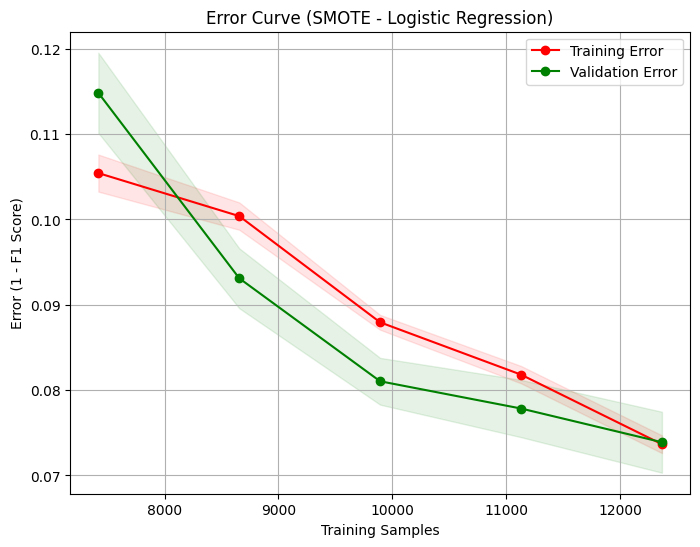

In [43]:
# ---- F1 scorer ----
f1_scorer = make_scorer(f1_score)

# ---- Stratified CV ----
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Full SMOTE-processed training data ----
X_full_smote = scaler_smote.fit_transform(X_train_smote)
y_full_smote = y_train_smote

# ---- Learning Curve (F1 scores) ----
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=model_smote,
    X=X_full_smote,
    y=y_full_smote,
    cv=cv,
    scoring=f1_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.6, 1.0, 5),
    error_score=np.nan
)

# ---- Convert F1 Scores to Errors ----
train_error_smote = 1 - train_scores_smote
test_error_smote = 1 - test_scores_smote

# ---- Means & Std for Error ----
train_mean_error = np.nanmean(train_error_smote, axis=1)
test_mean_error = np.nanmean(test_error_smote, axis=1)
train_std_error = np.nanstd(train_error_smote, axis=1)
test_std_error = np.nanstd(test_error_smote, axis=1)

# ---- Plot Error Curve ----
plt.figure(figsize=(8, 6))
plt.title("Error Curve (SMOTE - Logistic Regression)")
plt.xlabel("Training Samples")
plt.ylabel("Error (1 - F1 Score)")
plt.grid(True)

plt.fill_between(train_sizes_smote,
                 train_mean_error - train_std_error,
                 train_mean_error + train_std_error,
                 alpha=0.1, color="red")

plt.fill_between(train_sizes_smote,
                 test_mean_error - test_std_error,
                 test_mean_error + test_std_error,
                 alpha=0.1, color="green")

plt.plot(train_sizes_smote, train_mean_error, "o-", color="red", label="Training Error")
plt.plot(train_sizes_smote, test_mean_error, "o-", color="green", label="Validation Error")

plt.legend(loc="upper right")
plt.show()


# Model Diagnostic Curves: AUC-ROC, Loss, and Error

These three concepts are essential for assessing a classifier's performance, stability, and generalization ability, especially when dealing with imbalanced data (like your machine failure dataset).

### 1. AUC-ROC Curve (Area Under the Receiver Operating Characteristic)

The ROC curve measures how well a model distinguishes between positive and negative classes across all possible probability thresholds.

Purpose

-> Discrimination Power: It shows the trade-off between the True Positive Rate (TPR / Recall) and the False Positive Rate (FPR).

-> Threshold-Agnostic: It provides a metric (the AUC score) that is independent of the classification threshold, making it reliable for imbalanced datasets where accuracy is misleading.

Interpretation

AUC Score:

1.0: Perfect model.

0.5: Random guessing (the diagonal line).

Goal: The curve should hug the top-left corner (high TPR, low FPR).

### 2. Loss Curve (or Cost Curve)

The Loss Curve tracks the instantaneous penalty the model incurs for its mistakes during the optimization phase.

Purpose

-> Optimization Monitoring: To monitor the convergence and stability of the model's training process (e.g., using Gradient Descent).

-> Model's Internal View: It tracks the model's objective function (e.g., Log Loss for Logistic Regression).

Interpretation (Loss vs. Epochs/Iterations)

Convergence: Both training loss and validation loss should smoothly decrease and flatten out (converge).

Overfitting: If the training loss continues to drop but the validation loss stops dropping or starts increasing, the model is memorizing the training data but failing to generalize. This indicates high variance.

### 3. Error Curve (Learning Curve)

The Error Curve (which your code generates using $1 - \text{F1 Score}$) is a diagnostic tool that plots model performance against the size of the training data.

Purpose

-> Bias vs. Variance Diagnosis: It helps determine if the model is suffering from high bias (underfitting) or high variance (overfitting).

-> Data Sufficiency: It shows whether adding more data would likely improve the model's performance.

Calculation

$$\text{Error} = 1 - \text{Score (F1)}$$

Interpretation (Error vs. Training Samples)

Training Error (Red Line): Shows error on data the model has seen.

Validation Error (Green Line): Shows error on unseen data (internal cross-validation folds).

High Bias (Underfitting): Both curves flatten out at a high error rate, and the gap between them is small. The model is too simple.

High Variance (Overfitting): The training error is low (good fit on seen data), but the validation error is high (poor generalization), resulting in a large gap between the curves.

Ideal Fit: Both curves decrease and converge to a low error rate.

### True Positive Rate (TPR) and False Positive Rate (FPR)
1. True Positive Rate (TPR)

The TPR measures how successful the model is at finding the positive class when it genuinely exists.

Formula:$$TPR = \frac{TP}{TP + FN} = \frac{\text{True Positives}}{\text{All Actual Positives}}$$

Common Synonyms:

-> Recall (as seen in your Classification Reports)
-> Sensitivity

2. False Positive Rate (FPR)

The FPR measures how often the model incorrectly predicts the positive class when it doesn't exist.

Formula:$$FPR = \frac{FP}{FP + TN} = \frac{\text{False Positives}}{\text{All Actual Negatives}}$$

Common Synonyms:

-> 1 - Specificity


Specificity (True Negative Rate — TNR)

TNR measures how effectively the model correctly identifies the negative class when it is actually negative.

Formula: $$\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$

Out of all actual negative cases, how many did the model correctly detect as negative?

Common Synonyms:

-> True Negative Rate (TNR)

-> Selectivity